<a href="https://colab.research.google.com/github/simulate111/Gurobi_modeling-examples/blob/master/my_circle_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gurobipy

In [ ]:
import gurobipy as gb
from gurobipy import GRB

In [ ]:
# Create an environment with your WLS license
params = {
"WLSACCESSID": '30960ada-e6d9-4e9d-b958-d31d7d321670',
"WLSSECRET": '4bb79e54-f0c9-40e1-9719-3ae74b33dfee',
"LICENSEID": 2779394,
}


In [ ]:

env = gb.Env(params=params)
#env = gb.Env()

# Create the model within the Gurobi environment
model = gb.Model(env=env)


x=model.addVar(vtype=GRB.CONTINUOUS, name='x')
y=model.addVar(vtype=GRB.CONTINUOUS, name='y')
cont=20

model.addConstr(x**2+y**2<=cont)

model.setObjective(y-x, sense=GRB.MAXIMIZE)

model.optimize()

global optimal_x, optimal_y
optimal_x = x.X
optimal_y = y.X
print(f"Optimal x: {optimal_x}")
print(f"Optimal y: {optimal_y}")
print(f"Optimal objective value: {model.ObjVal}")

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2779394
Academic license 2779394 - for non-commercial use only - registered to ak___@gmail.com
Gurobi Optimizer version 13.0.1 build v13.0.1rc0 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2779394 - for non-commercial use only - registered to ak___@gmail.com
Optimize a model with 0 rows, 2 columns and 0 nonzeros (Max)
Model fingerprint: 0x66594012
Model has 2 linear objective coefficients
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
  QRHS range       [2e+01, 2e+01]

Presolve removed 0 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrie

In [ ]:
#or using implemented free license

Restricted license - for non-production use only - expires 2027-11-29
Gurobi Optimizer version 13.0.1 build v13.0.1rc0 (linux64 - "Ubuntu 22.04.5 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 0 rows, 2 columns and 0 nonzeros (Max)
Model fingerprint: 0x66594012
Model has 2 linear objective coefficients
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
  QRHS range       [2e+01, 2e+01]

Presolve removed 0 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective 4.47213595e+00
Optimal x: 0.0
Optimal y: 4.47213595499958
Optimal objective value: 4.47213595499958


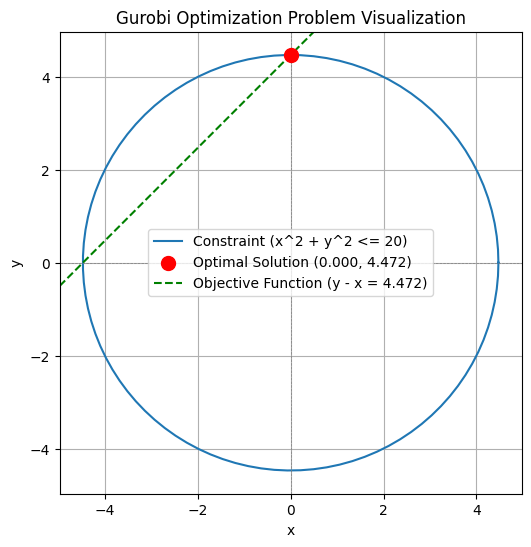

In [ ]:
with gb.Env() as en, gb.Model(env=en) as model:
    x=model.addVar(vtype=GRB.CONTINUOUS, name='x')
    y=model.addVar(vtype=GRB.CONTINUOUS, name='y')
    cont=20

    model.addConstr(x**2+y**2<=cont)

    model.setObjective(y-x, sense=GRB.MAXIMIZE)

    model.optimize()

    global optimal_x, optimal_y
    optimal_x = x.X
    optimal_y = y.X
    print(f"Optimal x: {optimal_x}")
    print(f"Optimal y: {optimal_y}")
    print(f"Optimal objective value: {model.ObjVal}")




    import matplotlib.pyplot as plt
import numpy as np

# Optimal solution from Gurobi is now read from global variables
# optimal_x and optimal_y are updated after Gurobi execution.

# The constraint is x^2 + y^2 <= 5, so the radius of the circle is sqrt(5)
constraint_radius_squared = cont # This should match the RHS of the Gurobi constraint
constraint_radius = np.sqrt(constraint_radius_squared)

theta = np.linspace(0, 2*np.pi, 100)
x_circle = constraint_radius * np.cos(theta)
y_circle = constraint_radius * np.sin(theta)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(x_circle, y_circle, label=f'Constraint (x^2 + y^2 <= {constraint_radius_squared})')
plt.scatter(optimal_x, optimal_y, color='red', marker='o', s=100, zorder=5, label=f'Optimal Solution ({optimal_x:.3f}, {optimal_y:.3f})')

# Add objective function line for visualization (y - x = constant)
# Since the objective is y - x, at the optimum, y - x = optimal_y - optimal_x
# Adjust limits for current circle, slightly larger than the radius
plot_limit = constraint_radius + 0.5
x_obj = np.linspace(-plot_limit, plot_limit, 100)
y_obj = x_obj + optimal_y - optimal_x # Line representing the optimal objective value
plt.plot(x_obj, y_obj, linestyle='--', color='green', label=f'Objective Function (y - x = {optimal_y - optimal_x:.3f})')

plt.title('Gurobi Optimization Problem Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.xlim(-plot_limit, plot_limit) # Adjust limits for current circle
plt.ylim(-plot_limit, plot_limit) # Adjust limits for current circle
plt.gca().set_aspect('equal', adjustable='box')
plt.show()